# Building neural networks with our bare hands (and numpy)

In [168]:
# import dependencies and define helpers
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

### Single-variable Linear Regression 

y = mx + c

_or_

y = β1x1 + β0

In [190]:
# David's happiness function
# y = mx + c, where m = 0.01, c = 30
m = 0.01
c = 30
income = 5000
happiness = (m * income) + c
print(happiness)

80.0


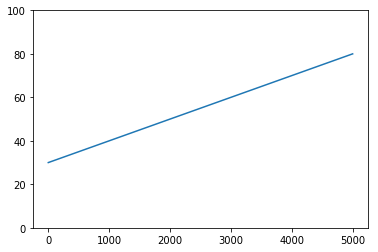

In [196]:
# Visualize David's happiness function

x = np.linspace(0,5000,100) 
y = 0.01 * x + 30 

plt.ylim([0, 100])
plt.plot(x,y)

In [192]:
# Applaying this on multiple data points (i.e. different x values)
income = [1000, 2000, 3000, 4000, 5000]
m = 0.01
c = 30
happiness = np.dot(m, income) + c
print(happiness)

[ 40.  50.  60.  70.  80.]


### Multi-variable Linear Regression

In [197]:
X = np.array([[1000, 2000, 3000, 4000 , 5000],
              [-100, -200, 3000, -4000, 5]])

W = np.zeros(10).reshape(5,2)
W.fill(0.01)
b = np.zeros((2))
b.fill(30)

Z = np.dot(X, W) + b

A1 = sigmoid(Z)

/Users/davidtan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: overflow encountered in exp


In [205]:
print("======== HIDDEN LAYER 1 ========\n")
print("{}\n{}\n".format("==== X: ====", X))
print("{}\n{}\n".format("==== M: ====", M))
print("{}\n{}\n".format("==== C: ====", C))
print("{}\n{}\n".format("==== Z: ====", Z))
print("{}\n{}\n".format("==== A1: ====", A1))

======== HIDDEN LAYER 1 ========

==== X: ====
[[ 1000  2000  3000  4000  5000]
 [ -100  -200  3000 -4000     5]]

==== M: ====
[[ 30.  30.]
 [ 30.  30.]
 [ 30.  30.]
 [ 30.  30.]
 [ 30.  30.]]

==== C: ====
[ 0.  0.]

==== Z: ====
[[ 450000.  450000.]
 [ -38850.  -38850.]]

==== A1: ====
[[ 1.  1.]
 [ 0.  0.]]



### Neural network in vanilla numpy

![neural network graph](./assets/neural-network-graph.png)

In [140]:
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1] ])
y = np.array([[0,1,1,1]]).T

W1 = 2*np.random.random((3,4)) - 1
W2 = 2*np.random.random((4,1)) - 1
for j in xrange(60000):
    # calculating output of layer 1    
    Z1 = np.dot(X,W1)
    A1 = sigmoid(Z1)
    
    # calculating output of layer 2
    Z2 = np.dot(A1,W2)
    A2 = sigmoid(Z2)
    
    # measure loss    
    A2_delta = (y - A2)*(A2*(1-A2))
    A1_delta = A2_delta.dot(W2.T) * (A1 * (1-A1))
    
    # update weight
    W2 += A1.T.dot(A2_delta)
    W1 += X.T.dot(A1_delta)

In [141]:
W1

array([[ 4.25,  2.79, -2.75, -1.74],
       [ 4.43,  2.49, -2.19, -2.46],
       [-2.2 , -1.41,  1.33,  1.11]])

In [142]:
W2

array([[ 6.85],
       [ 3.39],
       [-5.06],
       [-4.24]])

In [143]:
x_unseen = np.array([ [0,0,1],[0,1,1],[1,0,1],[1,1,1] ])
A1_ = sigmoid(np.dot(x_unseen,W1))
y_pred = sigmoid(np.dot(A1_,W2))
print(y_pred)

[[ 0.]
 [ 1.]
 [ 1.]
 [ 1.]]
